In [676]:
# Import libaries
import re


In [677]:
# Libary to import self-made libaries
import sys # https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
sys.path.insert(1, r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Libaries')

In [678]:
# Importing self-made libaries
import standards as s
import life_cycle_assessment as lc
import LCA_plots as lp
import reload_lib as rl
import non_bio_co2 as nbc
import add_plastic_sheet as aps
import import_ecoinvent_and_databases as ied


lib = [s, lc, lp, nbc, aps, ied]

In [679]:
# Path to where the code is stored
path = r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care'
# Specifying the LCIA method
lcia_method = 'recipe'

ecoinevnt_paths = {'ev391apos' : r"C:\Users\ruw\Desktop\4. semester\EcoInvent\ecoinvent 3.9.1_apos_ecoSpold02\datasets",
                   'ev391consq' : r"C:\Users\ruw\Desktop\4. semester\EcoInvent\ecoinvent 3.9.1_consequential_ecoSpold02\datasets",
                   'ev391cutoff' : r"C:\Users\ruw\Downloads\ecoinvent 3.9.1_cutoff_ecoSpold02\datasets"}
system_path = [r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Data\databases\case1.xlsx', 
                r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Data\databases\case2.xlsx']

rl.reload_lib(lib)
flow_legend, file_name, sheet_name, save_dir, initialization, file_name_unique_process = lc.initilization(path, lcia_method, ecoinevnt_paths, system_path)

Biosphere is already present in the project.
Ecoinvent 3.9.1 is already present in the project.
The folder case2_apos is created
Chosen flows:
SUD
MUD


In [680]:
database_project, database_name, flows, lcia_method, db_type = initialization
rl.reload_lib(lib)
FU, impact_category = lc.LCA_initialization(database_name, flows, lcia_method)


Recipe is selected
Initialization is completed


In [681]:
rl.reload_lib(lib)
df, plot_x_axis_all, impact_categories, unique = lc.quick_LCIA(path, initialization, file_name, file_name_unique_process, sheet_name)


Recipe is selected
Initialization is completed
Calculating for 21 methods and 16 activities : Total calculations 336


RuntimeError: Factor is exactly singular

In [ ]:
col = df.columns
col[1]

In [ ]:
unique[col[1]].to_frame()

In [ ]:
df.index

In [ ]:
lst = []
for exc in df.at['H400 REC', col[1]]:
    # print(exc[0])
    lst.append([exc[0], exc[1]])
lst.sort()
lst

In [ ]:
for idx in unique.index:
    print(idx)

In [668]:
df_rearranged = lc.rearrange_dataframe_index(df)

In [669]:
if 'recipe' in lcia_method:
    df_res, df_endpoint = lc.recipe_dataframe_split(df_rearranged)
    plot_x_axis_end = plot_x_axis_all[-3:]
    ic_mid = plot_x_axis_all[:-3] 
    plot_x_axis = []
    for ic in ic_mid:
        # print(ic)
        string = re.findall(r'\((.*?)\)', ic)
        if 'ODPinfinite' in  string[0]:
            string[0] = 'ODP'
        elif '1000' in string[0]:
            string[0] = 'GWP'
        plot_x_axis.append(string[0])

else:
    df_res = df_rearranged
    plot_x_axis = plot_x_axis_all

In [670]:
df_tot, df_scaled = lc.dataframe_element_scaling(df_res)
df_col = [df_res.columns[1]]
df_GWP = df_res[df_col]
rl.reload_lib(lib)

colors_ini = s.plot_colors(database_name, 'turbo')




<class 'dict'>


In [671]:
colors = [colors_ini[0],
          colors_ini[3],
          colors_ini[2],
          colors_ini[1],
          colors_ini[4],
          ]
for c in colors_ini[5:]:
    colors.append(c)
inputs = [flow_legend, colors, save_dir, db_type, database_name]

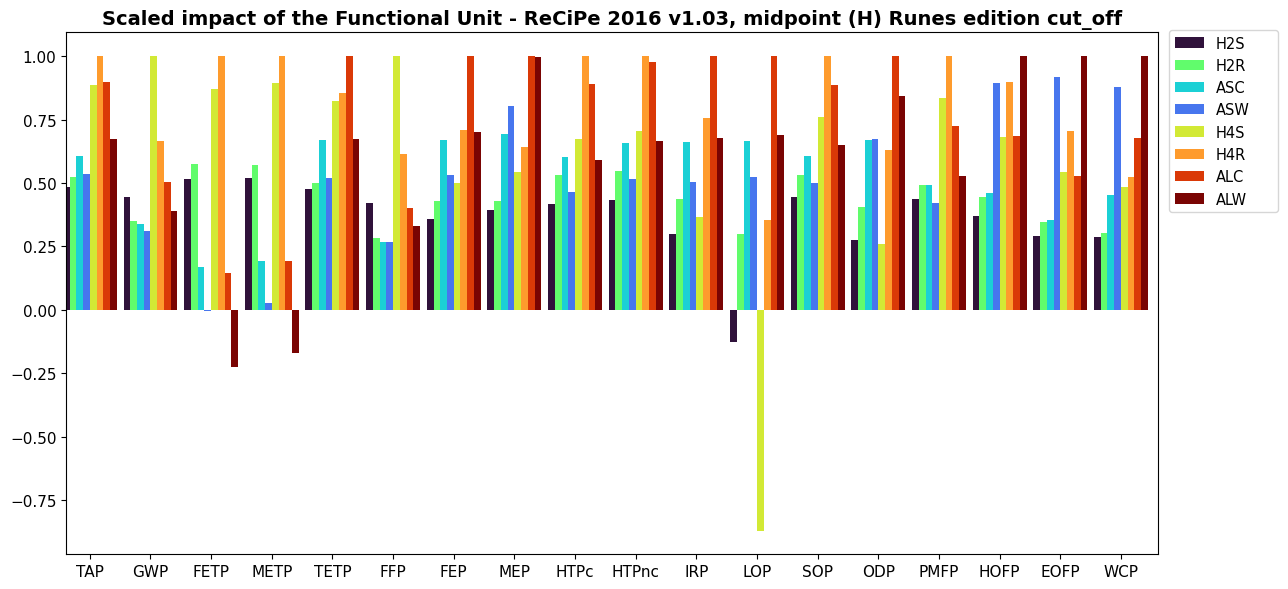

In [672]:
leg_pos_mid = .655
rl.reload_lib(lib)
lp.scaled_FU_plot(df_scaled, plot_x_axis, inputs, impact_categories, leg_pos_mid)

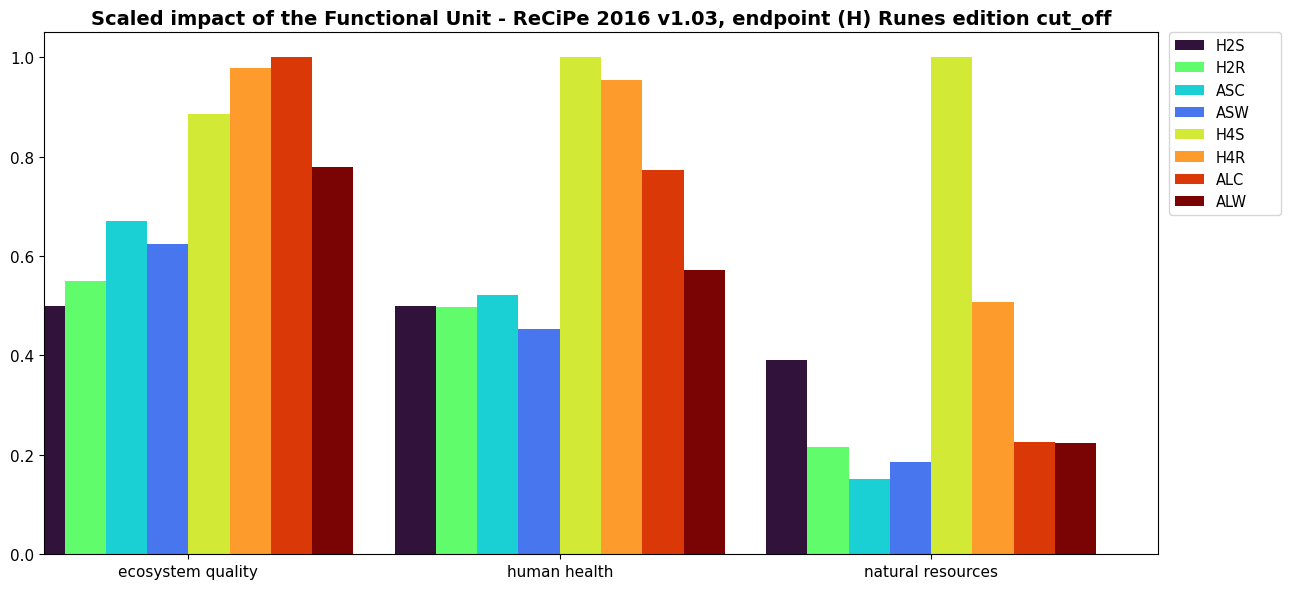

In [673]:
leg_pos_end = 0.65
if 'recipe' in lcia_method.lower():
    df_tot_e, df_scaled_e = lc.dataframe_element_scaling(df_endpoint)
    lp.scaled_FU_plot(df_scaled_e, plot_x_axis_end, inputs, impact_categories[-3:], leg_pos_end)


idx = H200 SU
'market for electricity, high voltage' (kilowatt hour, DK, None) -0.030655308370817272
'mixed heating grid' (megajoule, GLO, None) -0.08451545566120491
idx = H200 REC
'market for electricity, high voltage' (kilowatt hour, DK, None) -0.004598296255622591
'mixed heating grid' (megajoule, GLO, None) -0.012677318349180736
idx = alubox (small + dishwasher)
'market for electricity, high voltage' (kilowatt hour, DK, None) -3.859695857869877e-05
'mixed heating grid' (megajoule, GLO, None) -0.00010641026676217435
idx = alubox (small + wipe)
'market for electricity, high voltage' (kilowatt hour, DK, None) -0.004596402610477641
'mixed heating grid' (megajoule, GLO, None) -0.012672097645466054
idx = H400 SU
'market for electricity, high voltage' (kilowatt hour, DK, None) -0.08770314300939484
'mixed heating grid' (megajoule, GLO, None) -0.24179404769632087
idx = H400 REC
'market for electricity, high voltage' (kilowatt hour, DK, None) -0.013155471451409217
'mixed heating grid' (megajo

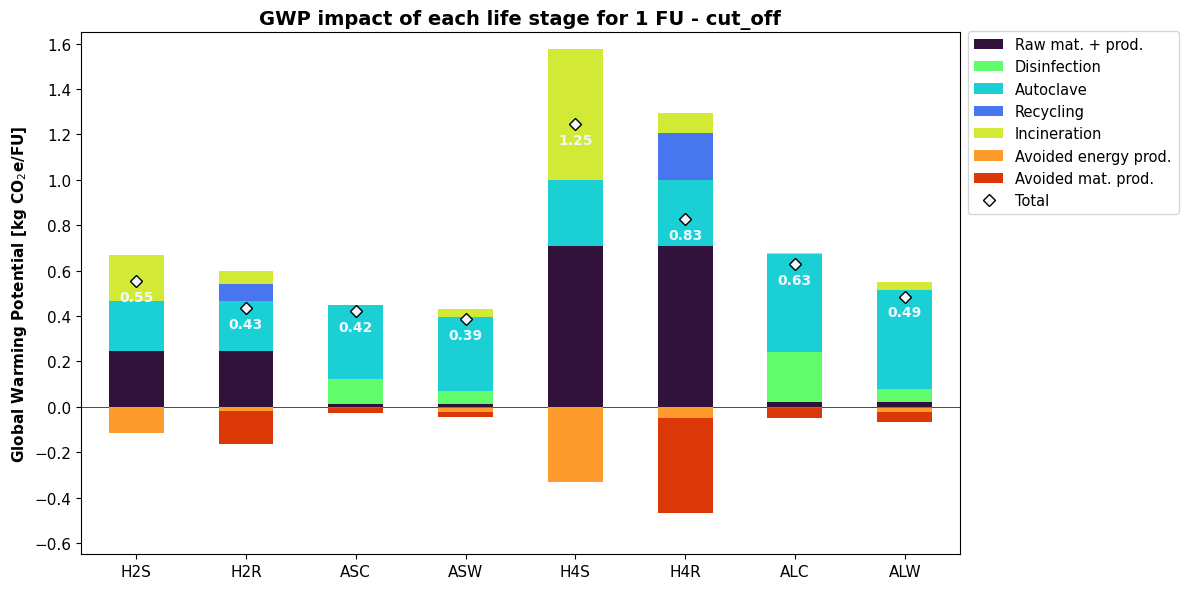

In [674]:
rl.reload_lib(lib)

y_min = -0.6
y_max = 1.6
step = 0.2
leg_pos = 0.652
marker_offset = 0.1
marker_color = 'aliceblue'
y_axis_values = [y_min, y_max, step, leg_pos, marker_offset, marker_color]
lp.gwp_scenario_plot(df_GWP, inputs, y_axis_values)


In [675]:
rl.reload_lib(lib)

amount_of_uses = 513
y_max = [400, 500]
ystep = [50, 50]
xstep = 25
break_even_product = 'container'
color_idx = [0, 2, 4, 6]

plot_controls = [amount_of_uses, y_max, ystep, xstep, break_even_product, color_idx]
lp.break_even_graph(df_GWP, inputs, plot_controls)

idx = H200 SU
idx = H200 REC
idx = alubox (small + dishwasher)
idx = alubox (small + wipe)
idx = H400 SU
idx = H400 REC
idx = alubox (large + dishwasher)
idx = alubox (large + wipe)
